In [1]:
%load_ext autotime
%config InlineBackend.figure_format = 'retina'

import os
import shutil
import tarfile
import numpy as np
import pandas as pd

import scarf
scarf.__version__

c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'0.9.2'

time: 2.03 s (started: 2021-07-19 18:22:14 +02:00)


In [2]:
cd C:/Users/parashar/Desktop/test_data/

C:\Users\parashar\Desktop\test_data
time: 0 ns (started: 2021-07-19 18:22:16 +02:00)


In [3]:
reader = scarf.CrH5Reader('atac_pbmc_500.h5', file_type='atac')
writer = scarf.CrToZarr(reader, 'atac_pbmc_500.zarr')
writer.dump()

100%|███████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]

time: 969 ms (started: 2021-07-19 18:22:16 +02:00)


In [4]:
ds = scarf.DataStore('atac_pbmc_500.zarr', nthreads=4)
ds.mark_prevalent_peaks(top_n=50000)
ds.make_graph(feat_key='prevalent_peaks', dims=100)

INFO: Setting assay ATAC to assay type: ATACassay
INFO: (ATAC) Computing nCells and dropOuts
[########################################] | 100% Completed |  0.2s
INFO: (ATAC) Computing nCounts
[########################################] | 100% Completed |  0.2s
INFO: (ATAC) Computing nFeatures
[########################################] | 100% Completed |  0.2s
INFO: (ATAC) Calculating peak prevalence across cells
[########################################] | 100% Completed |  0.5s
INFO: No value provided for parameter `log_transform`. Will use default value: True
INFO: No value provided for parameter `renormalize_subset`. Will use default value: True
INFO: No value provided for parameter `pca_cell_key`. Will use default value: I
INFO: Using LSI for dimension reduction
INFO: No value provided for parameter `ann_metric`. Will use default value: l2
INFO: No value provided for parameter `ann_efc`. Will use default value: min(100, max(k * 3, 50))
INFO: No value provided for parameter `ann_ef`.

Writing data to normed__I__prevalent_peaks/data: 100%|██████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]

INFO: Cluster number reduced to batch size of 484



c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


TypeError: __init__() got an unexpected keyword argument 'random_seed'

time: 3.95 s (started: 2021-07-19 18:22:25 +02:00)


In [6]:
# np.save('atac_feat_prevalence.npy', ds.ATAC.feats.fetch('stats_I_prevalence'))

# indices = ds.z.ATAC.normed__I__prevalent_peaks.reduction__lsi__11__I.ann__l2__50__50__48__4466.knn__11.indices[:]
# np.save('atac_knn_indices.npy', indices)

# distances = ds.z.ATAC.normed__I__prevalent_peaks.reduction__lsi__11__I.ann__l2__50__50__48__4466.knn__11.distances[:]
# np.save('atac_knn_distances.npy', distances)

time: 0 ns (started: 2021-07-19 16:48:56 +02:00)


In [5]:
a = ds.z.ATAC.normed__I__prevalent_peaks.reduction__lsi__11__I.ann__l2__50__50__48__4466.knn__11.indices[:]
b = np.load('atac_knn_indices.npy')

time: 0 ns (started: 2021-07-19 16:49:14 +02:00)


<AxesSubplot:>

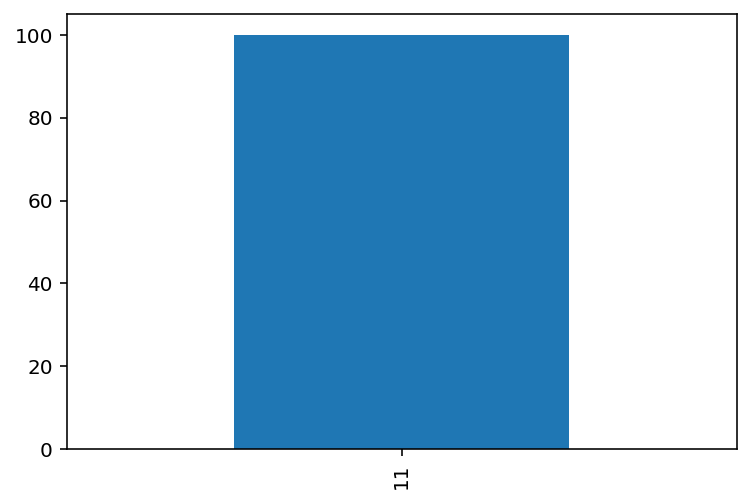

time: 360 ms (started: 2021-07-19 16:49:14 +02:00)


In [6]:
import pandas as pd

res = []
for i in range(a.shape[0]):
    res.append(len(set(a[i]).intersection(b[i])))
res = pd.Series(res).value_counts(sort=False).sort_index()
(100*res/res.sum()).plot(kind='bar')

In [5]:
# a = ds.ATAC.feats.fetch('stats_I_prevalence')
# b = np.load('atac_feat_prevalence.npy')
# np.all((a - b) < 1e-5)

time: 16 ms (started: 2021-07-19 13:06:49 +02:00)


In [11]:
ds.run_umap(fit_n_epochs=5000)

	completed  0  /  5000 epochs
	completed  500  /  5000 epochs
	completed  1000  /  5000 epochs
	completed  1500  /  5000 epochs
	completed  2000  /  5000 epochs
	completed  2500  /  5000 epochs
	completed  3000  /  5000 epochs
	completed  3500  /  5000 epochs
	completed  4000  /  5000 epochs
	completed  4500  /  5000 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
time: 10.8 s (started: 2021-07-19 13:46:57 +02:00)


In [12]:
ds.run_leiden_clustering(resolution=0.1)

time: 31 ms (started: 2021-07-19 13:47:07 +02:00)


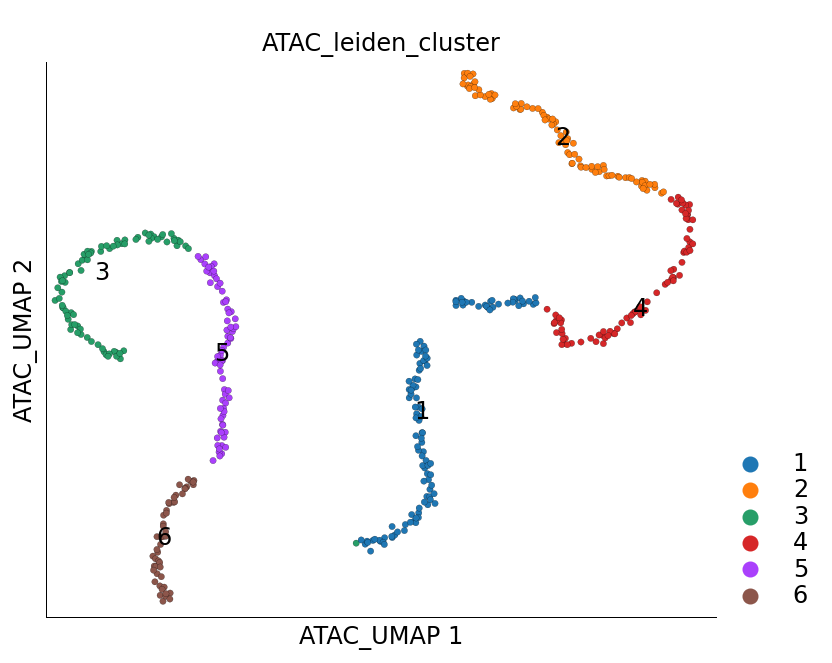

time: 219 ms (started: 2021-07-19 13:47:07 +02:00)


In [13]:
ds.plot_layout(layout_key='ATAC_UMAP', color_by='ATAC_leiden_cluster')

In [1]:
from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
import numpy as np

model1 = LsiModel(common_corpus, id2word=common_dictionary)
model2 = LsiModel(common_corpus, id2word=common_dictionary)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

In [ ]:
model1 = LsiModel(common_corpus, id2word=common_dictionary, nu)
model2 = LsiModel(common_corpus, id2word=common_dictionary)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

In [2]:
model1 = LsiModel(common_corpus, id2word=common_dictionary)
model2 = LsiModel(common_corpus, id2word=common_dictionary)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

False

In [3]:
model1 = LsiModel(common_corpus, id2word=common_dictionary, random_seed=100)
model2 = LsiModel(common_corpus, id2word=common_dictionary, random_seed=100)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

True

In [4]:
model1 = LsiModel(common_corpus, id2word=common_dictionary, random_seed=100)
model2 = LsiModel(common_corpus, id2word=common_dictionary)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

False

In [1]:
from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
import numpy as np

c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\users\parashar\miniconda3\envs\scarf\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
model1 = LsiModel(common_corpus, id2word=common_dictionary)
model2 = LsiModel(common_corpus, id2word=common_dictionary)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

False

In [3]:
model1 = LsiModel(common_corpus, id2word=common_dictionary, random_seed=100)
model2 = LsiModel(common_corpus, id2word=common_dictionary, random_seed=100)
np.all(model1.get_topics() - model2.get_topics() < 1e-10)

TypeError: __init__() got an unexpected keyword argument 'random_seed'